**Diabetes Prediction Dataset:**


About the dataset:

In the provided dataset, which can be found at the following link: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset, the focus is on predicting diabetes diagnosis using various health-related features. It is a classification problem where we aim to build a model that can classify new or unknown cases into two classes: "diabetic" and "non-diabetic".
The dataset contains several demographic and health-related attributes for each individual, including age, body mass index (BMI), blood pressure, insulin level, and glucose level, among others. These attributes serve as input features that can be used to predict the target variable, which is the diabetes diagnosis.


Load the Dataset:

In [17]:
#Load the dataset
from google.colab import drive
drive.mount('/content/drive')
import os
path='/content/drive/My Drive'
os.chdir(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
import pandas as pd
import numpy as np
diabetes_data = pd.read_csv('diabetes_prediction_dataset.csv')
np.random.seed(0)
diabetes_data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [19]:
diabetes_data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


Check for Missing Values:

In [20]:
missing_values_count=diabetes_data.isnull().sum()
missing_values_count[0:9]

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [21]:
#Check for missing values
total_cells=np.product(diabetes_data.shape)
total_missing=missing_values_count.sum()
perc=(total_missing/total_cells)*100
print(perc)

0.0


Clean the Data:

In [22]:
# Fill missing values with previous values 
diabetes_data.replace('No Info', float('nan'), inplace=True)
diabetes_data = diabetes_data.fillna(method='bfill', axis=0).fillna(0)

# Replace incorrect values in the 'age' column
condition = (diabetes_data['age'] < 1) | (diabetes_data['age'] % 1 != 0)
diabetes_data.loc[condition, 'age'] = 1

print(diabetes_data[0:160])

     gender   age  hypertension  heart_disease smoking_history    bmi  \
0    Female  80.0             0              1           never  25.19   
1    Female  54.0             0              0           never  27.32   
2      Male  28.0             0              0           never  27.32   
3    Female  36.0             0              0         current  23.45   
4      Male  76.0             1              1         current  20.14   
..      ...   ...           ...            ...             ...    ...   
155  Female   1.0             0              0            ever  14.43   
156  Female  54.0             0              0            ever  26.72   
157  Female  33.0             0              0           never  41.24   
158  Female  68.0             0              0          former  34.87   
159  Female  38.0             0              0          former  23.96   

     HbA1c_level  blood_glucose_level  diabetes  
0            6.6                  140         0  
1            6.6       

Scale the Data:

<Axes: ylabel='Count'>

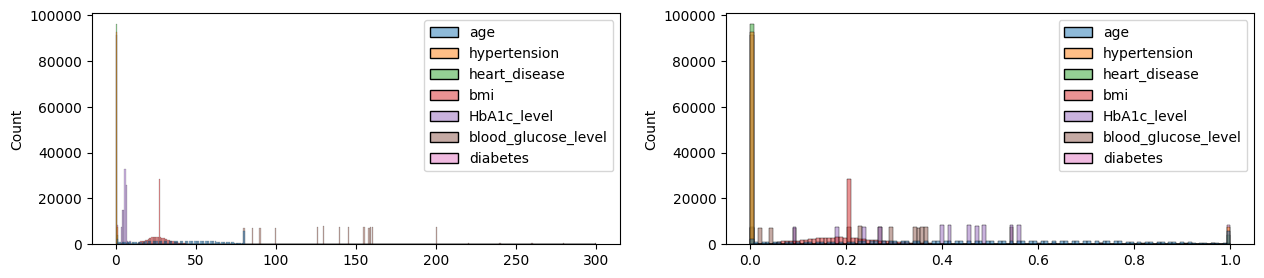

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from mlxtend.preprocessing import minmax_scaling

columns_to_scale = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']
diabetes_data_scaled = minmax_scaling(diabetes_data[columns_to_scale], columns=columns_to_scale)
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(diabetes_data[columns_to_scale], ax=ax[0])
sns.histplot(diabetes_data_scaled, ax=ax[1])

Normalize the Data:

<ipython-input-24-d78993205103>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  normalized_df=(diabetes_data - diabetes_data.mean())/diabetes_data.std()
<ipython-input-24-d78993205103>:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  normalized_df=(diabetes_data - diabetes_data.mean())/diabetes_data.std()


<Axes: ylabel='Count'>

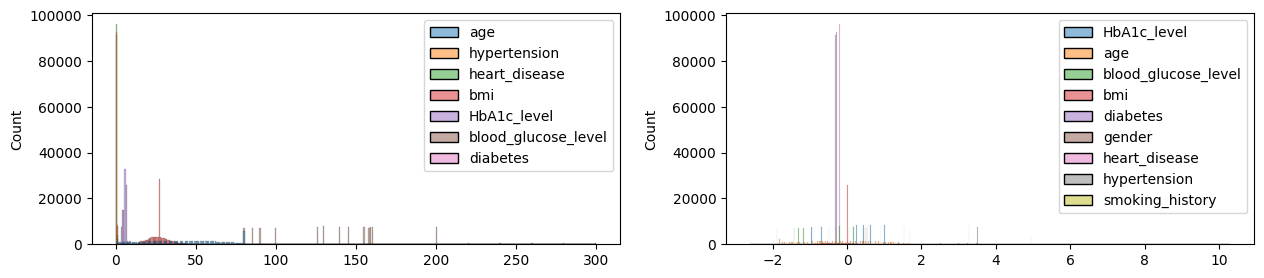

In [24]:
#Normalize the data
normalized_df=(diabetes_data - diabetes_data.mean())/diabetes_data.std()
fig,ax=plt.subplots(1,2,figsize=(15,3))
sns.histplot(diabetes_data,ax=ax[0])
sns.histplot(normalized_df,ax=ax[1])

Decision Tree Regressor:

In [9]:
#Fitting the dataset
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder

categorical_features = ['gender', 'smoking_history']
diabetes_data_encoded = pd.get_dummies(diabetes_data, columns=categorical_features)
y = diabetes_data_encoded['diabetes']
diabetes_features = ['age', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']
X = diabetes_data_encoded[diabetes_features]
diabetes_model = DecisionTreeRegressor(random_state=1)
diabetes_model.fit(X, y)

DecisionTreeRegressor(random_state=1)

Prediction:

In [10]:
#Prediction
from sklearn.metrics import mean_absolute_error
predicted=diabetes_model.predict(X)
mean_absolute_error(y,predicted)

0.005125680143386026

Train Test Split:

In [11]:
from sklearn.model_selection import train_test_split
train_x,val_x,train_y,val_y=train_test_split(X,y,random_state=0)

Training:

In [12]:
diabetes_model=DecisionTreeRegressor()
diabetes_model.fit(train_x,train_y)

DecisionTreeRegressor()

Predict:

In [13]:
val_prediction=diabetes_model.predict(val_x)
mean_absolute_error(val_y,val_prediction)

0.048968504495504495

In [14]:
def get_mea(max_leaf_nodes,train_x,val_x,train_y,val_y):
  model=DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes,random_state=0)
  model.fit(train_x,train_y)
  pre_va=model.predict(val_x)
  mea=mean_absolute_error(val_y,pre_va)
  return mea


In [15]:
for max_leaf_nodes in[5,50,250,500,5000]:
  my_mea=get_mea(max_leaf_nodes,train_x,val_x,train_y,val_y)
  print(my_mea)

0.05161731933441897
0.046156996159439356
0.046573669236675205
0.04670906367769523
0.04848850449550449


Random Forest Regressor:

In [16]:
from sklearn.ensemble import RandomForestRegressor
forest_model=RandomForestRegressor(random_state=1)
forest_model.fit(train_x,train_y)
mel_pred=forest_model.predict(val_x)
print(mean_absolute_error(val_y,mel_pred))

0.048924643492533476
